# Capstone Project - Credit card fraud detection

Submitted by Venkata Nagarjuna and Darpan Shah

 - The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models. 
 - In this project, we will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.
 - The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. 
 - Since the dataset is highly imbalanced, so it needs to be handled before model building.

### Our Approach: 

After going through the problem statement, we will be performing the following steps to achieve the problem statement.
1. Data reading:
     - Data reading 
     - undestanding the data 
     - Data visualization
     - Outlier treatment 
     - histogram of the target variable
     - Dropping the unnecessary columns
2. Splitting the data into test and Train data 
3. Modelling with Imbalance data:
    - Logistic regression
    - Decision trees
    - Random Forest
4. Data Imabalance Methods:
     - Random over Sampling
     - SMOTE
     - ADASYN
5. Modelling with the above imbalance methods: 
we will be performing the following models with each of the above imbalance techniques: 

    - Logistic regression
    - Decision trees
    - Random Forest
    - Naive- Bayes
    - KNN
6. Key Metrics
7. Hyper parameter Tuning
8. Conclusion
     

In [1]:
#importing necessary libraries for the analysis, data visualization, models and other required for the computational analysis
import numpy as np
import pandas as pd

#importing necesasry libraries for the data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing necessary libraries for model building
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter
from scipy import interp
import itertools

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the data set
credit_df = pd.read_csv('creditcard.csv')
#checking the sample data 
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory data analysis

In [3]:
#observe the different feature type present in the data
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
# checking the shape of the data 
credit_df.shape

(284807, 31)

In [5]:
# describing about the data set
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# checking for Null Values
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values present in the dataset.

In [7]:
#Checking Duplicate Values 
credit_df.loc[credit_df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


- There are 1081 records with dupplicated values but we are not dropping them because these values are already PCA transformed values.

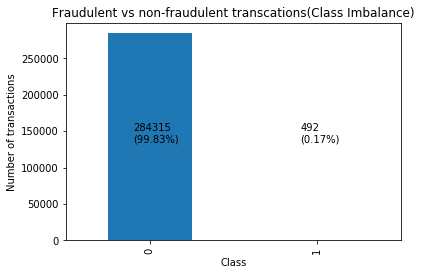

In [8]:
# checking for the class imbalance values
classes=credit_df['Class'].value_counts()

#classifyng the normal and fraud transactions
normal_share=classes[0]/credit_df['Class'].count()
fraud_share=classes[1]/credit_df['Class'].count()

# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
pt = credit_df['Class'].value_counts() 
plt.title('Fraudulent vs non-fraudulent transcations(Class Imbalance)')
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(credit_df['Class'].value_counts()[0], credit_df['Class'].value_counts()[0]/credit_df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.2}%)'.format(credit_df['Class'].value_counts()[1],credit_df['Class'].value_counts()[1]/credit_df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
pt.plot.bar()


From the above, we can observe that this is a binary classification problem with fraud or non-fraud transactions. the class imbalance can be handled in the imbalance methods before model building.

Text(0, 0.5, 'Class')

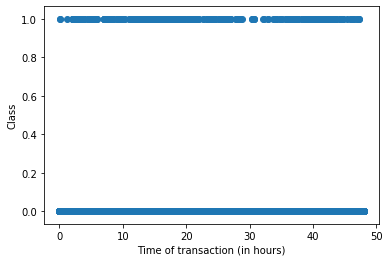

In [9]:
#visualizing the time variable and class using scatter plot is just to check whether time can give any insight of the class of the transaction
plt.scatter(credit_df['Time']/(60*60), credit_df['Class'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Class')



 - From the above, it is clear that the class of the trasanction distributed over the time and time will not provided any insight in this. 

Text(0, 0.5, 'Class')

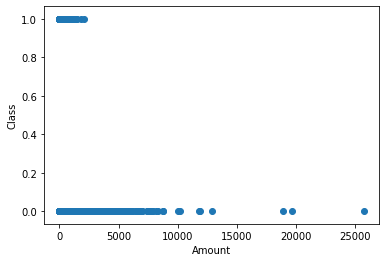

In [10]:
#visualizing the Amount variable and class
plt.scatter(credit_df['Amount'], credit_df['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')


- From the above, it is clear that the fraudlent transactions are concentrated at smaller amounts when compared to non fraudlent transactions. 

Text(0, 0.5, 'Density of probability')

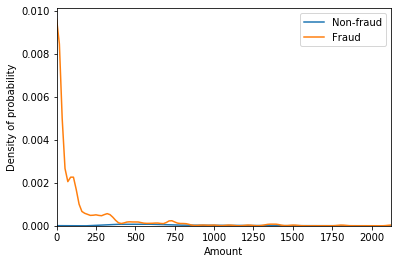

In [11]:
target_0 = credit_df.loc[credit_df['Class'] == 0]
target_1 = credit_df.loc[credit_df['Class'] == 1]
ax1=sns.distplot(target_0[['Amount']], hist=False, label='Non-fraud')
ax2=sns.distplot(target_1[['Amount']], hist=False, label='Fraud')
ax1.set_xlim(0, max(credit_df[credit_df['Class']==1]['Amount']))
ax2.set_xlim(0, max(credit_df[credit_df['Class']==1]['Amount']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')


In [12]:
credit_df.loc[credit_df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### checking for outliers


Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31904  (11.2%)


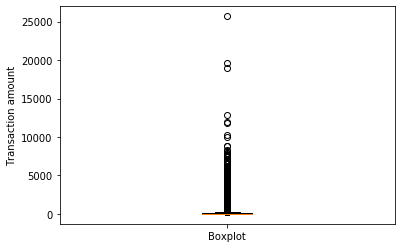

In [13]:
plt.boxplot(credit_df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amt = credit_df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amt,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amt[amt['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amt[amt['Amount'] < lower_bound].count()[0] / amt['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amt[amt['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amt[amt['Amount'] > upper_bound].count()[0] / amt['Amount'].count() * 100))

There are 11.2 % of outliers present in the upper bound which is not the good idea to cap / remove the outliers. hence we are proceeding with out any outlier treatment.

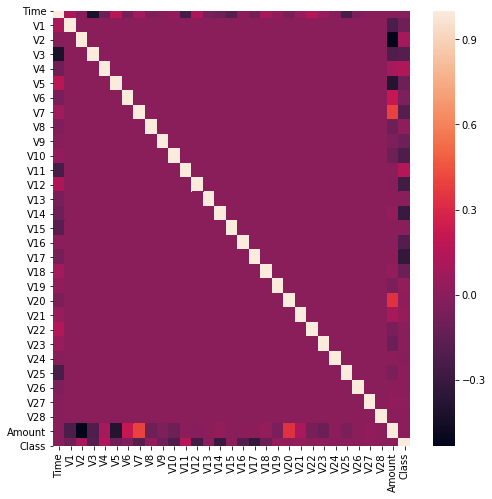

In [14]:
#heat map. 
plt.figure(figsize=(8,8))
sns.heatmap(data=credit_df.corr())
plt.show();

In [15]:
#Time feature are in seconds we will transform it ot minutes and hours 
timedelta = pd.to_timedelta(credit_df['Time'], unit='s')
credit_df['Time_hour'] = (timedelta.dt.components.hours).astype(int)
credit_df['Time_min'] = (timedelta.dt.components.minutes).astype(int)

Text(0.5, 1, 'Distribution of classes with Amount(Scatter Plot)')

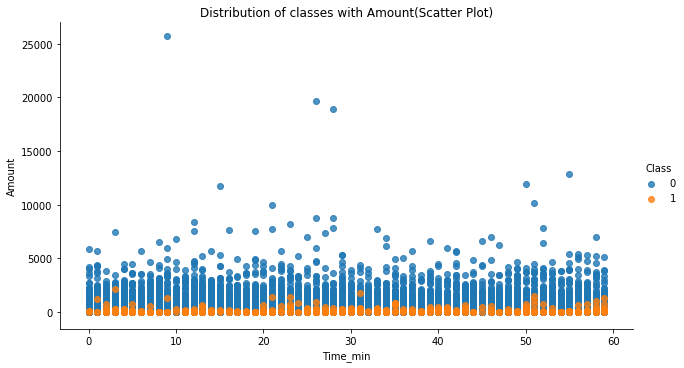

In [16]:
# Create a scatter plot to observe the distribution of classes with time
sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,data=credit_df, hue='Class')
plt.title('Distribution of classes with Amount(Scatter Plot)')

Text(0.5, 1.0, 'Distribution of classes with Amount')

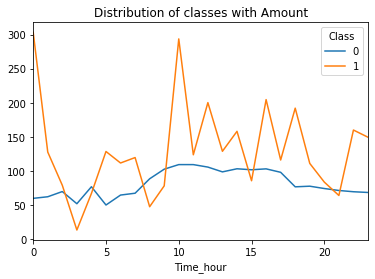

In [17]:
# Create a scatter plot to observe the distribution of classes with Amount
pd.pivot_table(credit_df, index = 'Time_hour', columns = 'Class', values 
= 'Amount').plot();
plt.title('Distribution of classes with Amount')

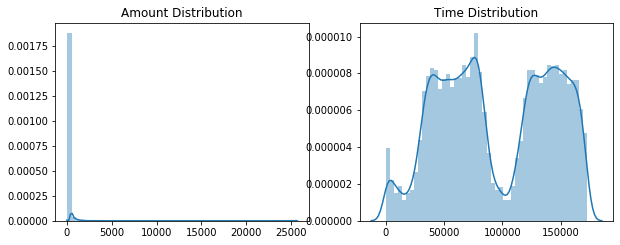

In [18]:
# visualizing the Amount and time distribution 
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
sns.distplot(credit_df['Amount'].values)
plt.title('Amount Distribution')

plt.subplot(2, 2, 2)
sns.distplot(credit_df['Time'].values)
plt.title('Time Distribution')
plt.show()

In [19]:
#dropping the unnecesary coloumns
X = credit_df.drop('Time_hour',axis=1)
X = credit_df.drop('Time_min',axis=1)

### Functions to use in the model evalution

In [20]:
# Function for plotting confusion matrix

def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from scipy import interp

# Function for plotting ROC curve and confusion matrix:

def ROC_curve(classifier, X_train, y_train, X_test, y_test):
    
    
    name = classifier[0]
    classifier = classifier[1]

    mean_fpr = np.linspace(0, 1, 100)
    class_names = ['Non-Fraud', 'Fraud']
    confusion_matrix_total = [[0, 0], [0, 0]]
    
    #Obtain probabilities for each class
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - model: ' + name)
    plt.legend(loc="lower right")
    plt.show()
    
    #Store the confusion matrix result to plot a table later
    y_pred=classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrix_total += cm
   
    #Print precision and recall
    tn, fp = confusion_matrix_total.tolist()[0]
    fn, tp = confusion_matrix_total.tolist()[1]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy = {:2.2f}%'.format(accuracy*100))
    print('Precision = {:2.2f}%'.format(precision*100))
    print('Recall = {:2.2f}%'.format(recall*100))
    
    # Plot confusion matrix
    plt.figure()
    confusion_matrix_plot(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
    plt.show()

## Train - test split

In [22]:
# Performing the train - test split:
y = credit_df['Class']
X = credit_df.drop(columns=['Class'])



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

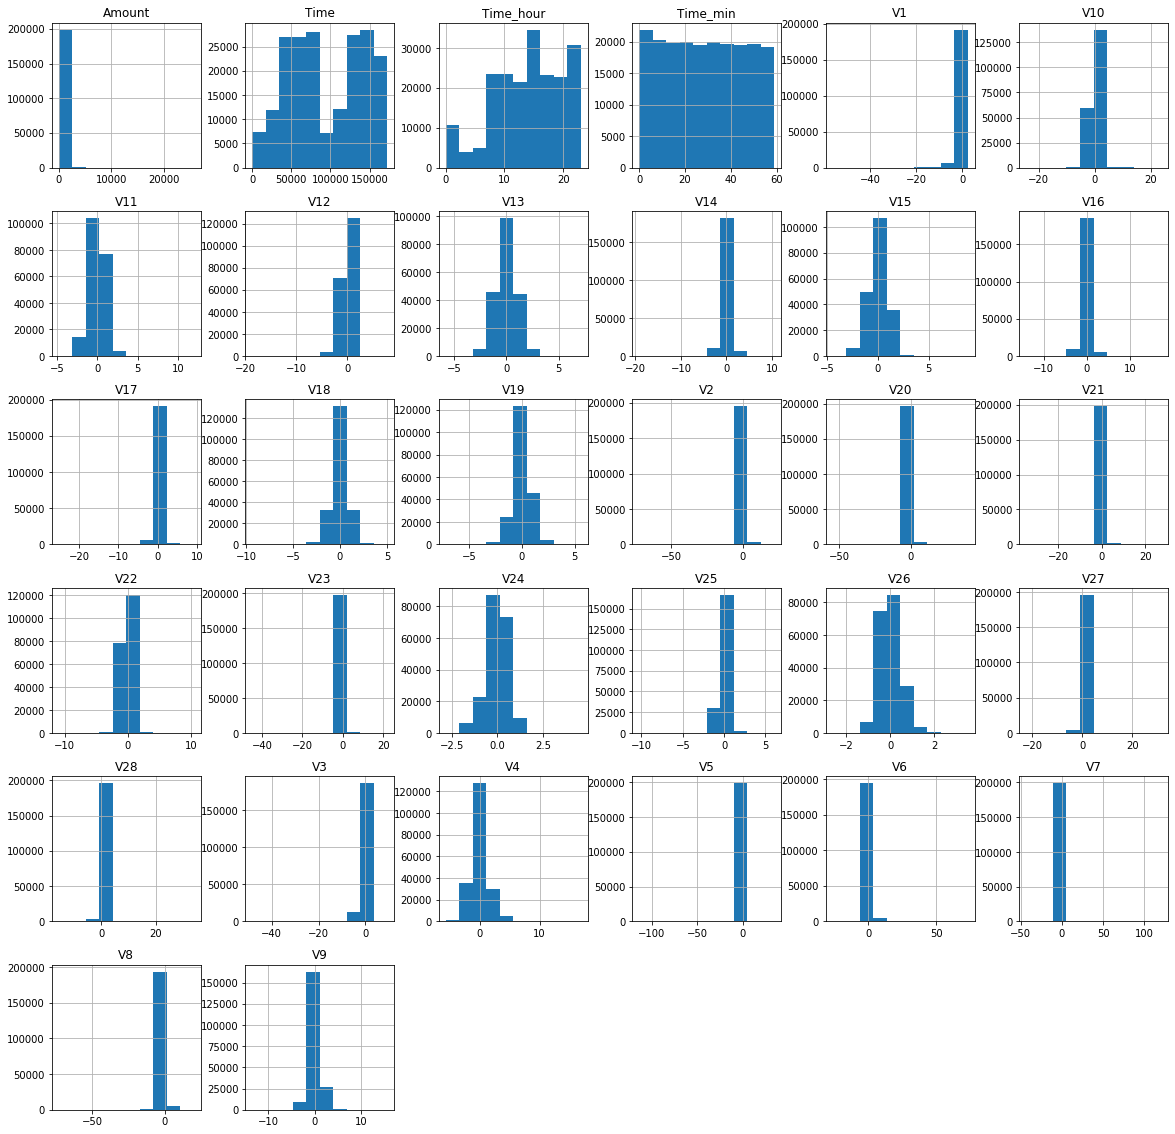

In [24]:
# plot the histogram of a variable from the dataset to see the skewness

X_train.hist(figsize=(20, 20));

In [25]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
scaler = StandardScaler()

# Fit and transform on the train data
pt.fit(X_train)
#X_train=scaler.fit_transform(X_train)

X_train_pt = pd.DataFrame(pt.transform(X_train))    ## Then apply on all data
X_test_pt = pd.DataFrame(pt.transform(X_test))

pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame
pt_y.fit(y_train.to_frame())
 
y_train_pt = pd.DataFrame(pt_y.transform(y_train.to_frame()))
y_test_pt = pd.DataFrame(pt_y.transform(y_test.to_frame()))

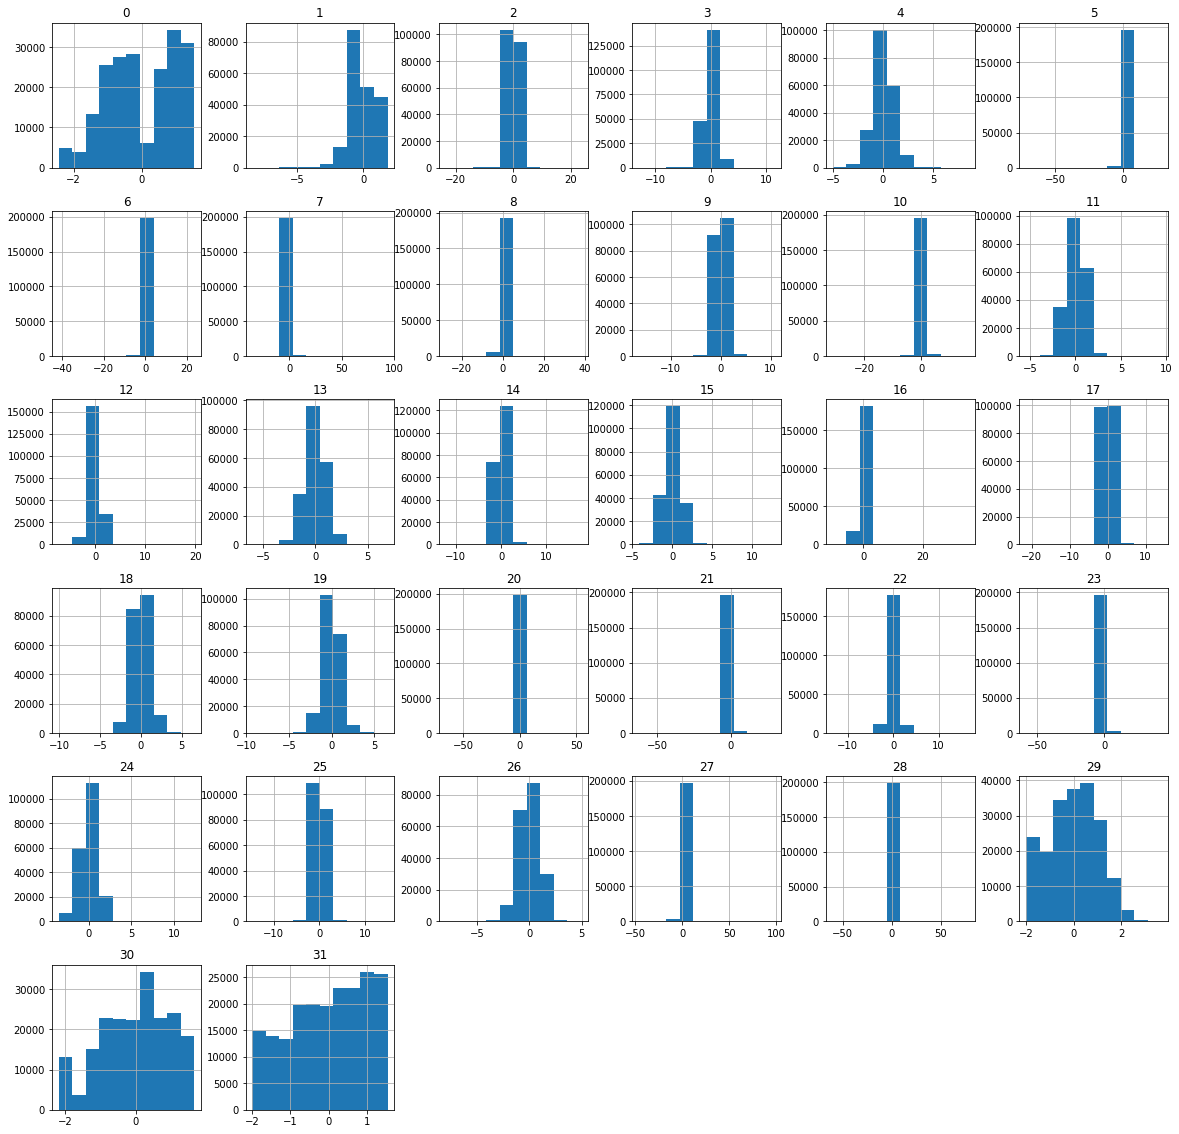

In [26]:
# plot the histogram of a variable from the dataset again to see the result 
X_train_pt.hist(figsize=(20, 20));

# Model Evalution on Imbalance Data

In [27]:
# the model we are using is the softvoting classifier  

models_imb = []

models_imb.append(('Logistic Regression', LogisticRegression(random_state=42)))
models_imb.append(('Decision Tree', DecisionTreeClassifier(random_state=42)))
models_imb.append(('Random Forest', RandomForestClassifier(random_state=42)))


#Ensemble classifier - All models have the same weight
ensemble_clf = VotingClassifier(estimators=models_imb, voting='soft', weights=np.ones(len(models_imb)))

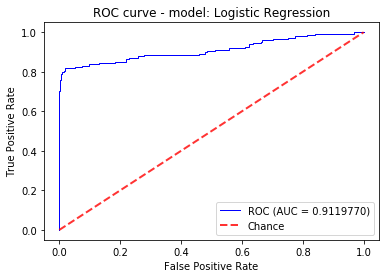

Accuracy = 99.91%
Precision = 81.36%
Recall = 64.86%


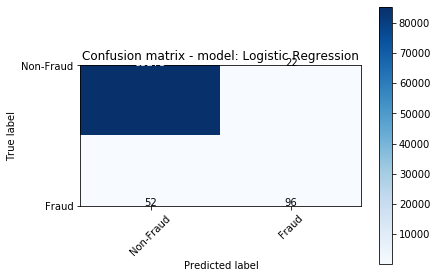

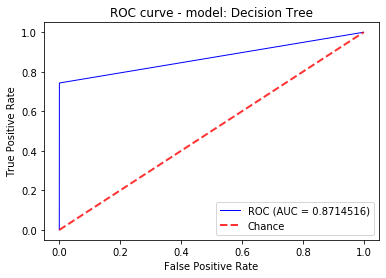

Accuracy = 99.92%
Precision = 79.14%
Recall = 74.32%


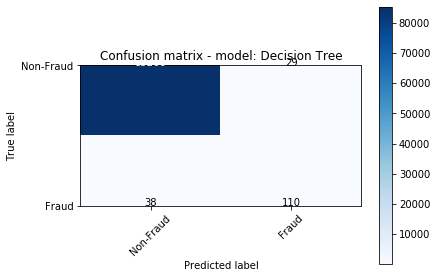

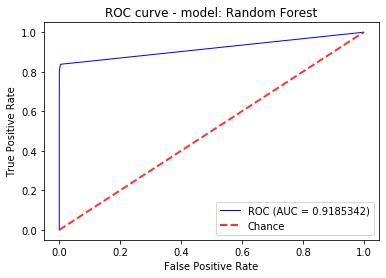

Accuracy = 99.94%
Precision = 93.10%
Recall = 72.97%


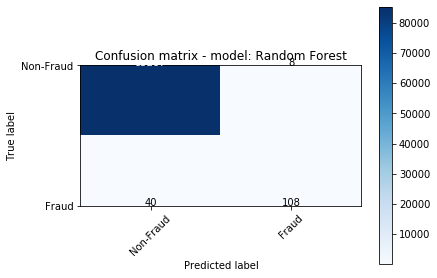

In [28]:
for model in models_imb:
    ROC_curve(model, X_train, y_train, X_test, y_test)

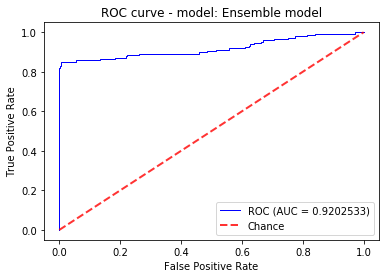

Accuracy = 99.94%
Precision = 91.06%
Recall = 75.68%


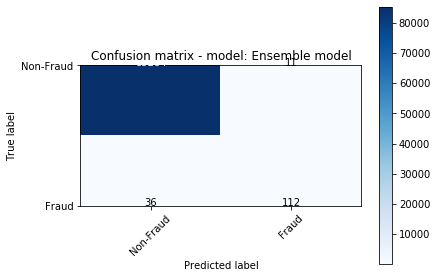

In [29]:
ROC_curve(('Ensemble model', ensemble_clf), X_train, y_train, X_test, y_test)

From the above, the Imbalance data models are accurate over 99% Hence we cannot trust the highly imbalance data models and we are proceeding with the Data balancing techniques

# Handling Imbalance class

Now we will start procceding with the 
 - Random over sampling
 - SMOTE
 - ADASYN

#### Random Over Sampling

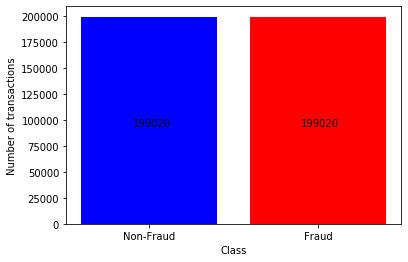

In [30]:
credit_ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_ros, y_ros = credit_ros.fit_resample(X_train, y_train)

# Checking If classes are balanced:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_ros)[0], Counter(y_ros)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_ros)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_ros)[1]), (0.70, 0.45), xycoords='axes fraction')
plt.show()

#### Synthetic Minority over Sampling(SMOTE)

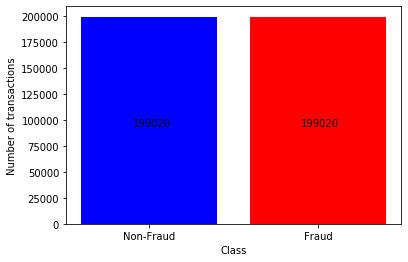

In [31]:
credit_smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = credit_smote.fit_resample(X_train, y_train)

# Checking If classes are balanced:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_smote)[0], Counter(y_smote)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_smote)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_smote)[1]), (0.70, 0.45), xycoords='axes fraction')
plt.show()

#### ADASYN

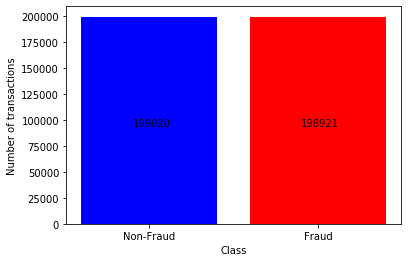

In [32]:
credit_adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_adasyn, y_adasyn = credit_adasyn.fit_resample(X_train, y_train)

# Checking If classes are balanced:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_adasyn)[0], Counter(y_adasyn)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_adasyn)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_adasyn)[1]), (0.70, 0.45), xycoords='axes fraction')
plt.show()

## Checking the difference between ROS, SMOTE, ADASYN

In [33]:
# creating function to scale the data 
def standard_scale(X, X_test=X_test):
    scale_std = StandardScaler().fit(X)
    X_std = scale_std.transform(X)
    X_test_std = scale_std.transform(X_test)
    return X_std, X_test_std

In [34]:
# transforming the data using various imbalance techniques used above
X_ros_std, X_test_ros_std = standard_scale(X_ros)
X_smote_std, X_test_smote_std = standard_scale(X_smote)
X_adasyn_std, X_test_adasyn_std = standard_scale(X_adasyn)

pca = PCA(n_components=2)
X_ros_pca = pca.fit_transform(X_ros_std)
X_smote_pca = pca.fit_transform(X_smote_std)
X_adasyn_pca = pca.fit_transform(X_adasyn_std)

In [35]:
# function to visualize the plot
def plot_pca(X, y, label='Classes'):
    colors = ['green', 'blue']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y==l, 0], X[y==l, 1], c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='best')
    plt.show()

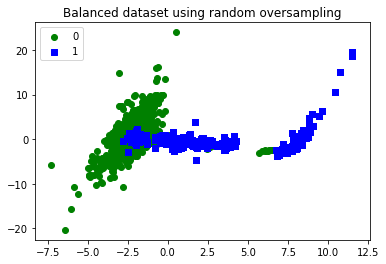

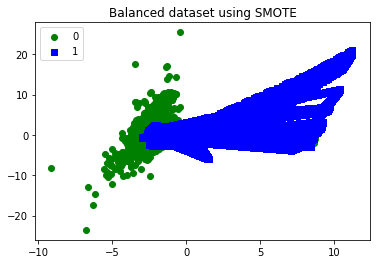

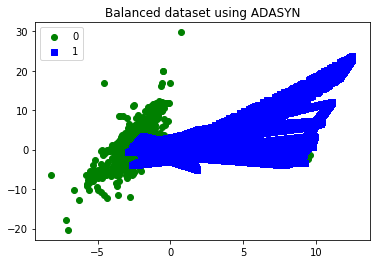

In [36]:
plot_pca(X_ros_pca, y_ros, 'Balanced dataset using random oversampling')
plot_pca(X_smote_pca, y_smote, 'Balanced dataset using SMOTE')
plot_pca(X_adasyn_pca, y_adasyn, 'Balanced dataset using ADASYN')

From the above, We can see that the fraudulent transactions are present in the different coordinates on the Graphs above. 

## Model Selection  and Evaluation

In [37]:
# The ensemble model used here is a soft voting classifier which puts the same weight to all individual models' class probabilities. 
# We already know that models that combine predictions from more than one single model can achieve a better performance.

models = []

models.append(('Logistic Regression', LogisticRegression(random_state=42)))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=42)))
models.append(('Random Forest', RandomForestClassifier(random_state=42)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

#Ensemble classifier - All models have the same weight
ensemble_clf = VotingClassifier(estimators=models, voting='soft', weights=np.ones(len(models)))


## Key Metrics

For evaluating any model first comes with key metric is Accuracy. But in this data set we cannot completely depend on Accuracy as this data set is highly imbalanced with non-fraud transactions about 98 % and fraud transactions about less than 2%. Hence we need to consider other metrics before evaluating the model. 
Other Key Metrics includes:
    - Roc curve
    - Precision 
    - Recall
Precision and Recall can be calculated from the Confusion matrix. 

## Results - Random Over Sampling

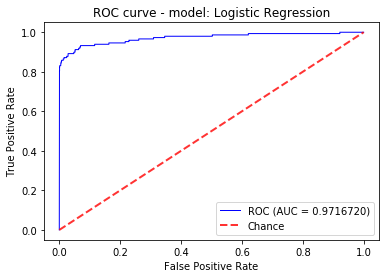

Accuracy = 97.81%
Precision = 6.51%
Recall = 87.16%


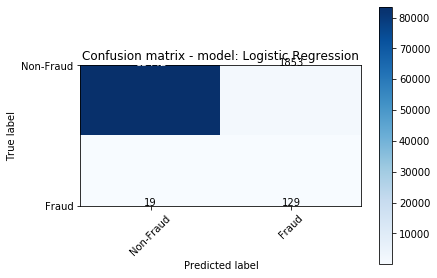

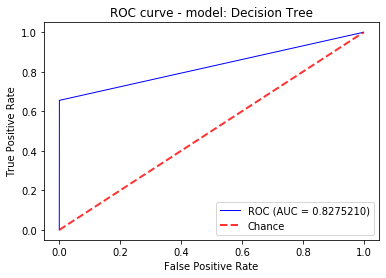

Accuracy = 99.90%
Precision = 75.78%
Recall = 65.54%


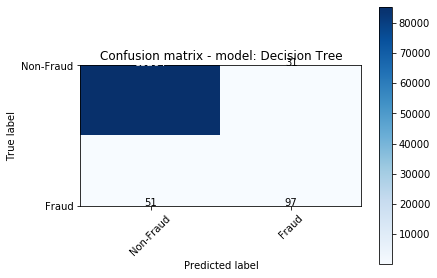

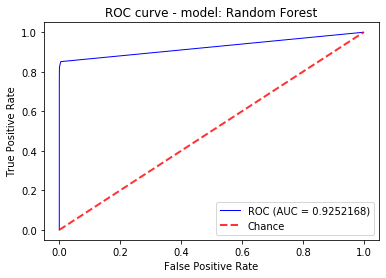

Accuracy = 99.95%
Precision = 95.54%
Recall = 72.30%


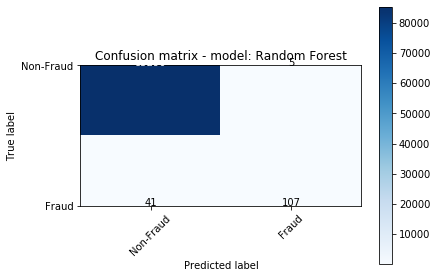

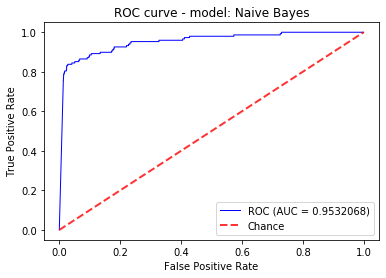

Accuracy = 97.41%
Precision = 5.32%
Recall = 83.11%


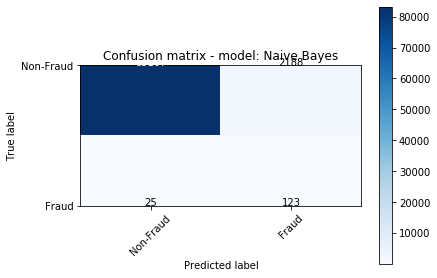

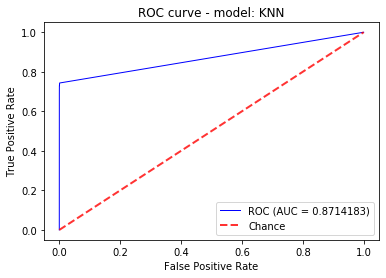

Accuracy = 99.90%
Precision = 70.13%
Recall = 72.97%


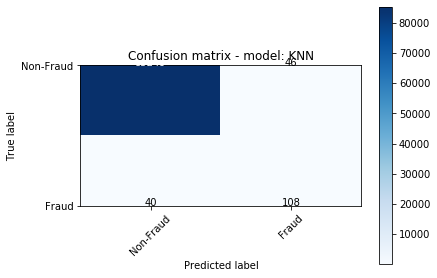

In [38]:
for model in models:
    ROC_curve(model, X_ros_std, y_ros, X_test_ros_std, y_test)

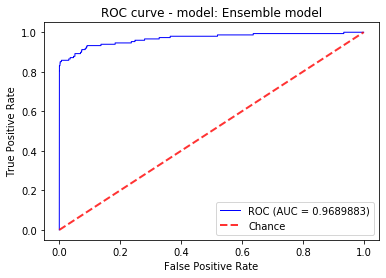

Accuracy = 99.94%
Precision = 84.96%
Recall = 76.35%


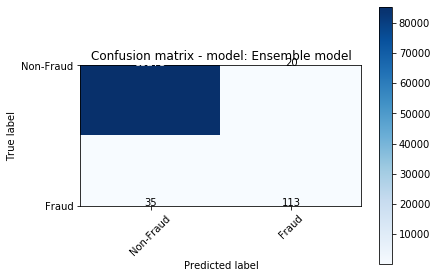

In [39]:
ROC_curve(('Ensemble model', ensemble_clf), X_ros_std, y_ros, X_test_ros_std, y_test)

## Results - SMOTE

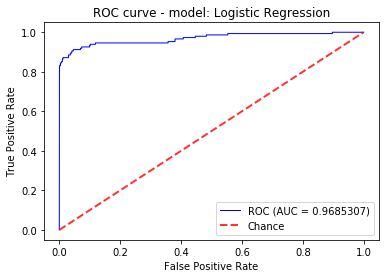

Accuracy = 99.14%
Precision = 14.98%
Recall = 85.14%


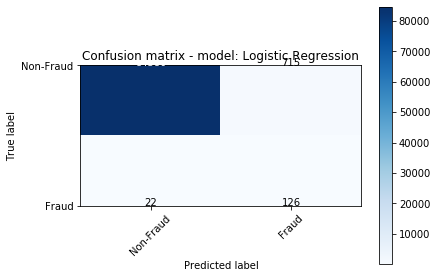

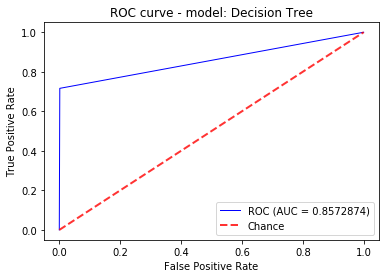

Accuracy = 99.79%
Precision = 43.09%
Recall = 71.62%


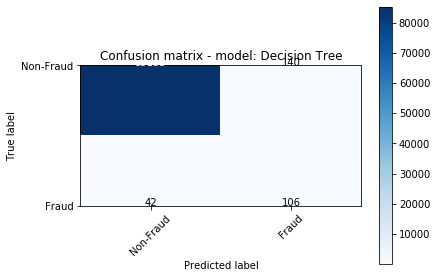

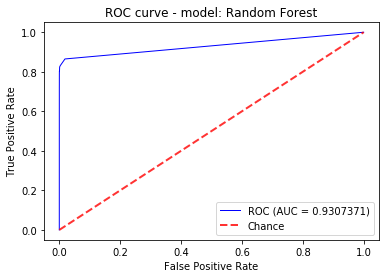

Accuracy = 99.94%
Precision = 87.22%
Recall = 78.38%


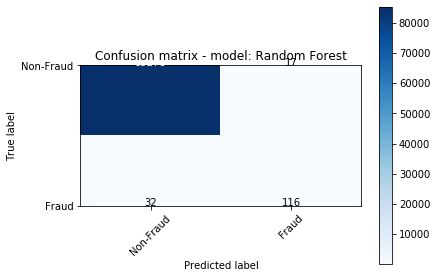

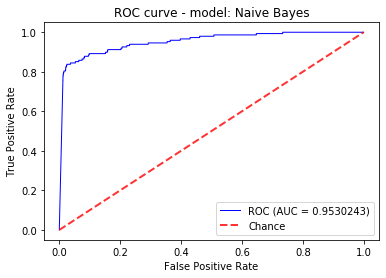

Accuracy = 97.70%
Precision = 5.92%
Recall = 82.43%


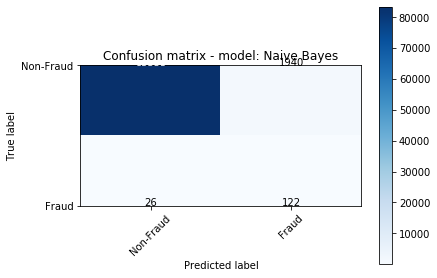

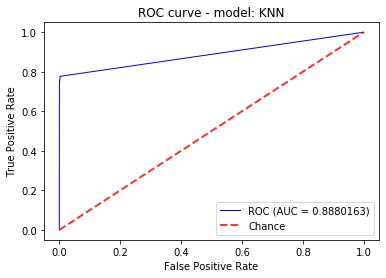

Accuracy = 99.82%
Precision = 48.91%
Recall = 75.68%


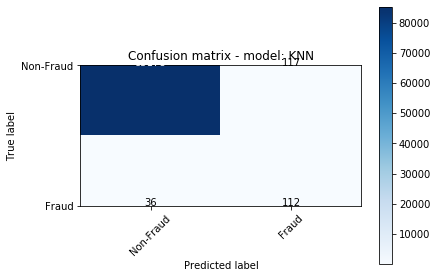

In [40]:
for model in models:
    ROC_curve(model, X_smote_std, y_smote, X_test_smote_std, y_test)

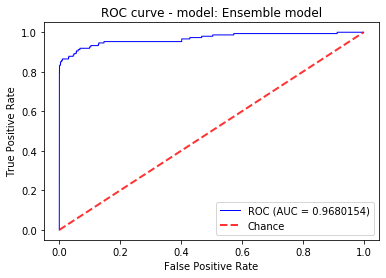

Accuracy = 99.92%
Precision = 73.17%
Recall = 81.08%


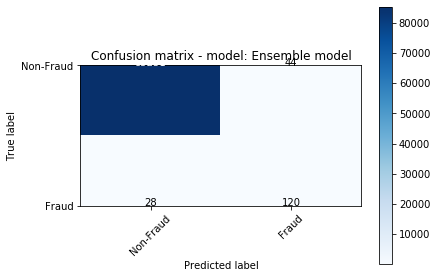

In [41]:
ROC_curve(('Ensemble model', ensemble_clf), X_smote_std, y_smote, X_test_smote_std, y_test)

## Results - ADASYN

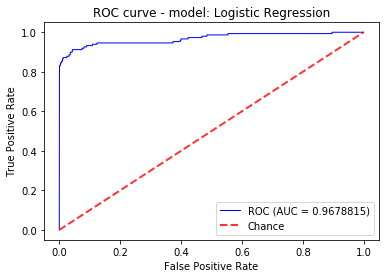

Accuracy = 99.08%
Precision = 14.09%
Recall = 85.14%


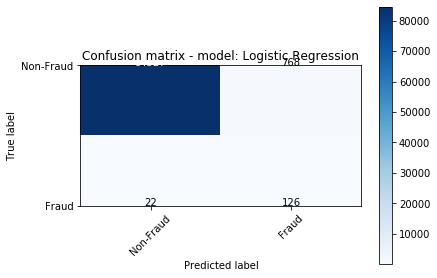

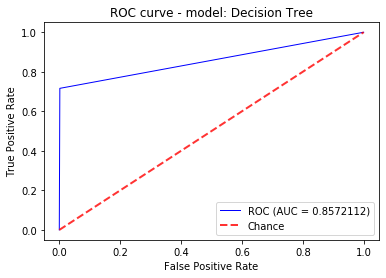

Accuracy = 99.77%
Precision = 40.93%
Recall = 71.62%


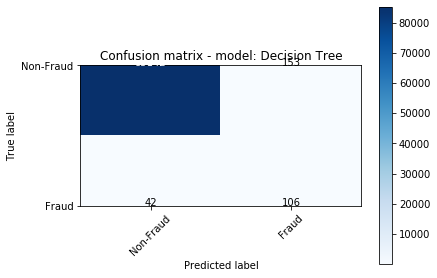

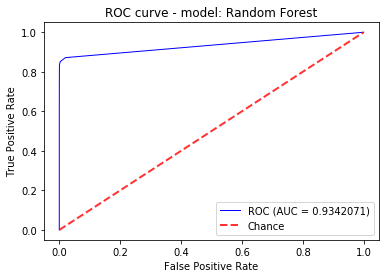

Accuracy = 99.94%
Precision = 84.44%
Recall = 77.03%


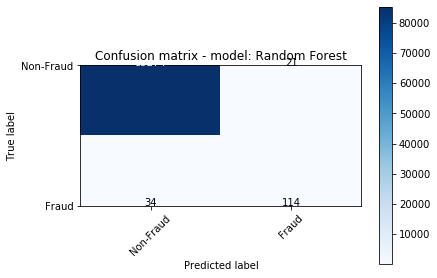

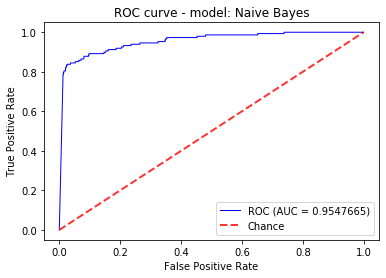

Accuracy = 97.55%
Precision = 5.61%
Recall = 83.11%


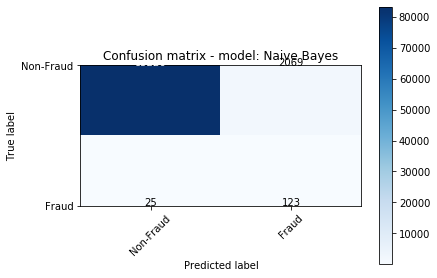

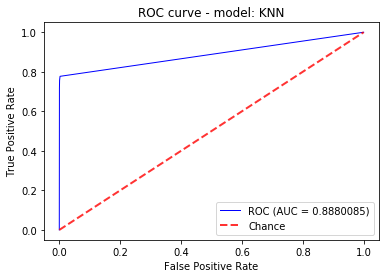

Accuracy = 99.82%
Precision = 48.09%
Recall = 76.35%


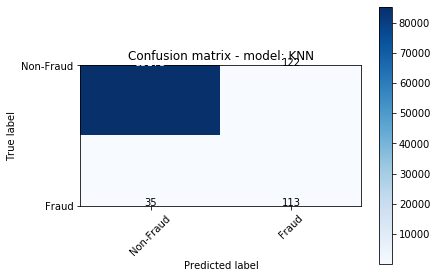

In [42]:
for model in models:
    ROC_curve(model, X_adasyn_std, y_adasyn, X_test_adasyn_std, y_test)

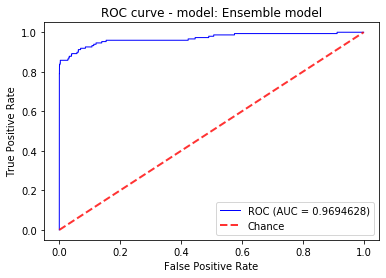

Accuracy = 99.91%
Precision = 70.24%
Recall = 79.73%


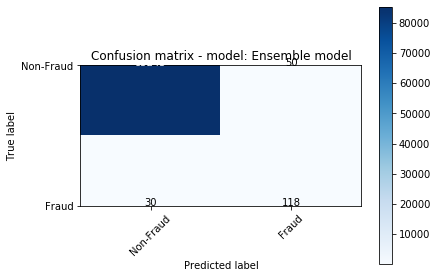

In [43]:
ROC_curve(('Ensemble model', ensemble_clf), X_adasyn_std, y_adasyn, X_test_adasyn_std, y_test)

## Hyper parameter Tuning

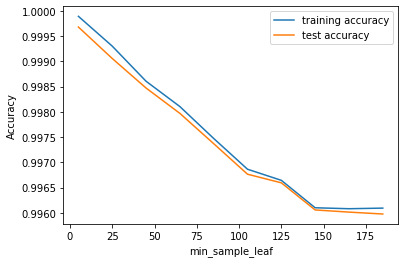

In [44]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_ros_std, y_ros)

# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_ros_std, y_ros)

# Make predictions
prediction_test = model_rf.predict(X_test_smote_std)
print ('Random Forest Accuracy after Hyperparameter tuning',metrics.accuracy_score(y_test, prediction_test))

Random Forest Accuracy with Tuned Hyperparameter 0.9993797034280163


In [46]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.67      0.79       148

    accuracy                           1.00     85443
   macro avg       0.98      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [47]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from imblearn.metrics import sensitivity_specificity_support
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, prediction_test, average='binary')
print("Sensitivity is : \t", round(sensitivity, 2), "\n", "Specificity is: \t", round(specificity, 2), sep='')

[[85291     4]
 [   49    99]]
Sensitivity: 	0.67
Specificity: 	1.0


From the above, The scores with out tuning the hyperparameters are pretty significant when compared with the scores with Hyperparameter tuning. Hence we are proceeding to conlclusion with out hyper parameters.

### Conclusion:

Random oversampling: Ensemble combined model with

    - AUC = 0.9689, 
    - Recall = 76.35% and 
    - Precision = 84.96%

However, we can notice that the Random forest model was the second best in this case with AUC = 0.92.

SMOTE: Simple Logistic Model with Logistic Regression with

    - AUC = 0.9685
    - Precision = 14.98% and 
    - Recall = 85.14%
    
However we can notice that Ensemble Model was the second best in this case with the AUC = 0.9680 , Precision = 73.17%
and Recall = 81.08%

ADASYN: Ensemble combined model with the 

    - AUC = 0.9694
    - Precision = 70.24% and 
    - Recall 79.73%
    
    Ensemble Model with the equal weights shown the best model In ADASYN with the AUC of 0.9694 which is pretty good but the precision is 
    However Combined ensemble model with Random over Sampling also shows good AUC, Precision and Recall. 
    
    Logistic Regression will be the benchmark model for the binary classification problem and if our intention is to maximize the AUC and other key metrics we need to tweak the weights of the each simple model so that we can achieve the maximum of these key metrics. 